---------------------5001 : 156 images ---------------------
Training time for 5001 : 0:00:10
(156,)
                                              img_hash  img_names
0    1346324364137148562981597927608564255635095564...          3
1    4737909782050487190939594815016423383906584365...          3
2    1054642877685307418459860852827794296948217473...          2
3    9251734752722223310005183337992630939694104959...          2
4    1552518080034516055737253242328919704497856796...          2
..                                                 ...        ...
138  9698500166244733637740506537833010371366029941...          1
139  9667259576502011065297239634054025011609912737...          1
140  9665337116573372905277600755432109446610395600...          1
141  1201356079907047305292219968826991217255529302...          1
142  1261373489954616932974679785789425942370947394...          1

[143 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

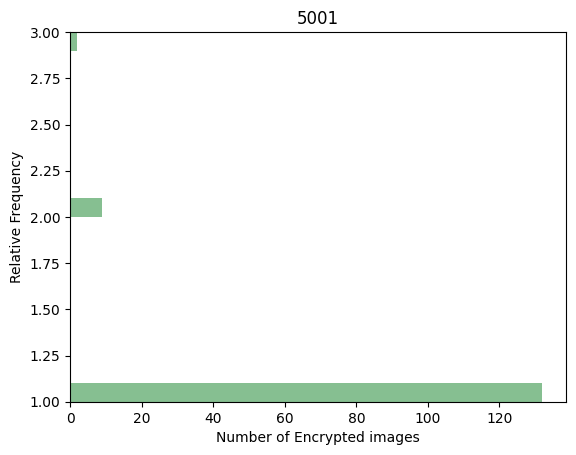

--------------------76001 : 156 images ---------------------
Training time for 76001 : 0:00:10
(156,)
                                             img_hash  img_names
0   1552518092290930563012569938633629621141560669...          9
1   2842976845263985487252219622087318170223510592...          4
2   2475082849706172236256229069283321151018719056...          3
3   1552233817747671219987659603954920166336054752...          3
4   3880820514460634039894852471143046694895328003...          3
..                                                ...        ...
85  3760005564267360493791653050133106971637448129...          1
86  3760479355387259217755658881488560116729939803...          1
87  3822546079601357959298714701724171083457686620...          1
88  4730329487625695421350090868818921970081815481...          1
89  1552518092300703419496716466718912532182944309...          1

[90 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

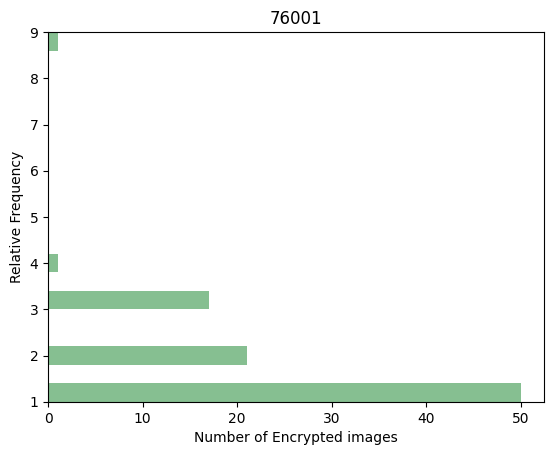

--------------------54001 : 156 images ---------------------
Training time for 54001 : 0:00:13
(156,)
                                             img_hash  img_names
0   3873241131898614454571735723448775035906672720...         13
1   9480443039849342095288600429914065528566039377...          6
2   1079177283543467500169431544421800486488871749...          4
3   1552138978593203643157364947900479745337770181...          3
4   9693766883615039847782603550246016854638042262...          3
..                                                ...        ...
87  1974732757402107300620027152972278959767099792...          1
88  1943834483725351674951812186808844845358234579...          1
89  1941595081350086960330133254896209655135113669...          1
90  1940648425077113254920244487444136586009638776...          1
91  1552517999786006132888850398989811058563450721...          1

[92 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

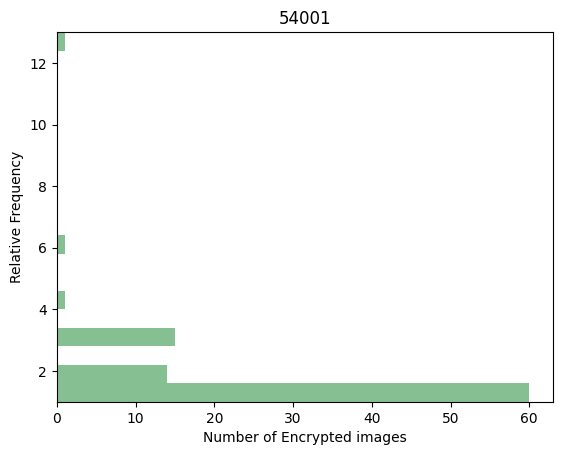

--------------------41001 : 156 images ---------------------
Training time for 41001 : 0:00:09
(156,)
                                             img_hash  img_names
0                                                   0         63
1   1358074320733462659194924227350269093671461779...          2
2   2792760060568219058107277376212425470147512672...          1
3   3879510186439321718631985467758878245569530622...          1
4   3824440971060804152519607944433336956496507642...          1
..                                                ...        ...
88  3789402000931849995870794302648536627954490170...          1
89  3760737130434818986282344256198719226415672717...          1
90  3316767795324163675641439022318195512065716414...          1
91  3316536226137292617294199552649149606453553533...          1
92  1552517999766067395032837571400549621648210783...          1

[93 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

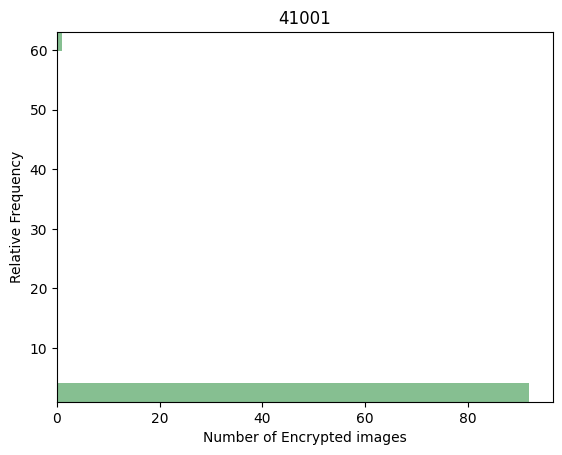

--------------------23001 : 156 images ---------------------
Training time for 23001 : 0:00:09
(156,)
                                             img_hash  img_names
0                                                   0         65
1   1944437942742552005190526410160128800860137448...          1
2   3879510186439321718631985467758878245569530622...          1
3   3824440971060804152519607944433336956496507642...          1
4   3823520499671913226777721582863182996953449691...          1
..                                                ...        ...
87  3789402226752998342307325290816669636509524351...          1
88  3789402000931849995870794302648536627954490170...          1
89  3760737130434818986282344256198719226415672717...          1
90  3316536226137292617294199552649149606453553533...          1
91  1552517999780363619950378400821663491106679187...          1

[92 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

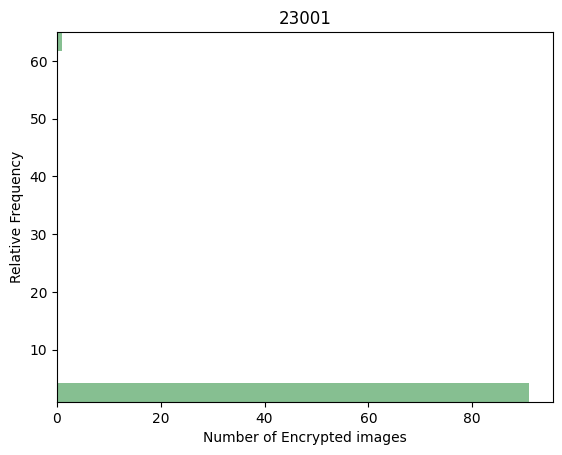

--------------------68001 : 156 images ---------------------
Training time for 68001 : 0:00:09
(156,)
                                             img_hash  img_names
0                                                   0         51
1   1819357948918501010743252363276330211854210228...          2
2   1552518011330586225372902843404819414538346502...          2
3   1552139152078028119662814412438596221682607690...          2
4   1552139105854567643526710342129415056459021926...          2
..                                                ...        ...
89  1819358064704790077272504006239024820005692592...          1
90  1819358064676549936745609175137020798821620835...          1
91  1819358050245831714057815637749876093486887136...          1
92  1819357948918542795579610875390630935615572785...          1
93  1935909706356285716710456748659949528430474716...          1

[94 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

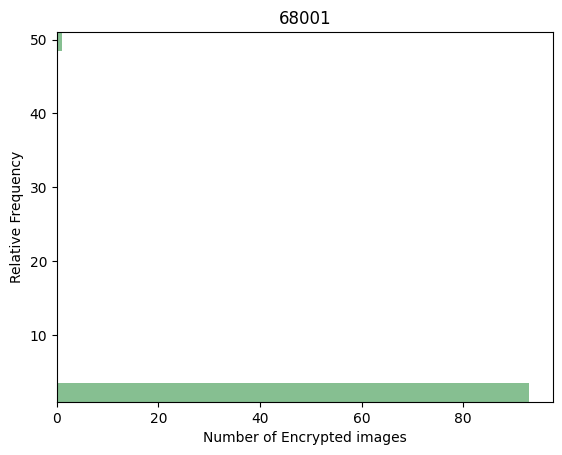

--------------------50001 : 156 images ---------------------
Training time for 50001 : 0:00:09
(156,)
                                              img_hash  img_names
0    1552139152100620230154497213701238379927127377...          3
1    1819535512214963125311816107794732098166920437...          2
2    1522527034418552964799508353311317502536683282...          2
3    1412276060418351848483491048119348351142035911...          2
4    1358074368146184618936173474910857337030596443...          2
..                                                 ...        ...
134  1698126588523535909643403073793339503150423382...          1
135  1698126588523497989522587702011739683034352452...          1
136  1698067545366984436924097326507280014166323961...          1
137  1698067422494088939286261025573531563883044406...          1
138  1552518092281026690682747843098940671025355840...          1

[139 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

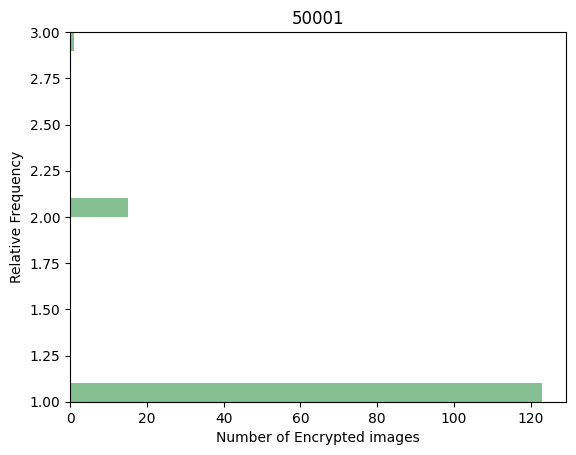

---------------------8001 : 156 images ---------------------
Training time for 8001 : 0:00:09
(156,)
                                             img_hash  img_names
0                                                   0         67
1   1358074320733462659194924227350269093671461779...          2
2   7759601507001194609397879212305614565733311949...          1
3   3881294305393067363807281798770693326834606382...          1
4   3824440971060804152519607944433336956496507642...          1
..                                                ...        ...
84  3316767795324163675641439022318195512065716414...          1
85  3315726948401992443975122602012241169736901348...          1
86  3315726779064556674388347965464537205834964144...          1
87  3315721579307070366678675626705474919281709535...          1
88  1552518092300708935148650740021163139365116869...          1

[89 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

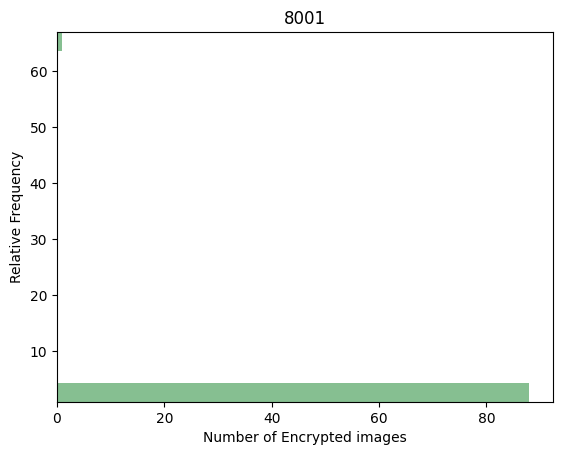

--------------------73001 : 156 images ---------------------
Training time for 73001 : 0:00:09
(156,)
                                              img_hash  img_names
0    1552140141070308570950247583992105071866969398...          4
1    1552187554864666225153060689238452099178771432...          4
2    1358266687405203446722593650679833133110136736...          3
3    2960376358351999041646059632534280520249472093...          3
4    2910972348239049173834747401312114548836128790...          2
..                                                 ...        ...
117  1358074298726098023153832762671983905663772844...          1
118  1353102362003630808992631972785176828752732010...          1
119  1261734743950973393215896513219276797345144937...          1
120  1261373524972394898385758540627098037612935506...          1
121  1552518092278116823479313818697705294027980515...          1

[122 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

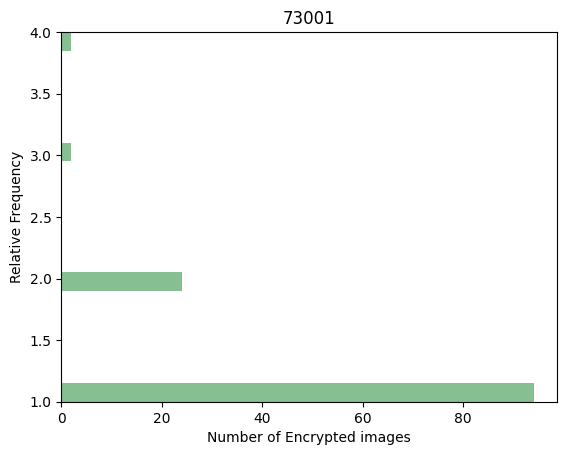

---------------------5360 : 156 images ---------------------
Training time for 5360 : 0:00:10
(156,)
                                              img_hash  img_names
0                                                    0         44
1    5818153328455214873114521068966119849464255437...          2
2    1358074320733462659194924227350269093671461779...          2
3    1819831393137746686197372982018966853951452669...          2
4    1819358064733030215136069880656727755975226256...          2
..                                                 ...        ...
103  7310586980171393860727477116558164410923876081...          1
104  7310584668716450991467433644770462825328638579...          1
105  5188001339557995274529944417623042227404940172...          1
106  4851627134340095515651554227187631681932833024...          1
107  1552518092278122337953635086775056830345216236...          1

[108 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

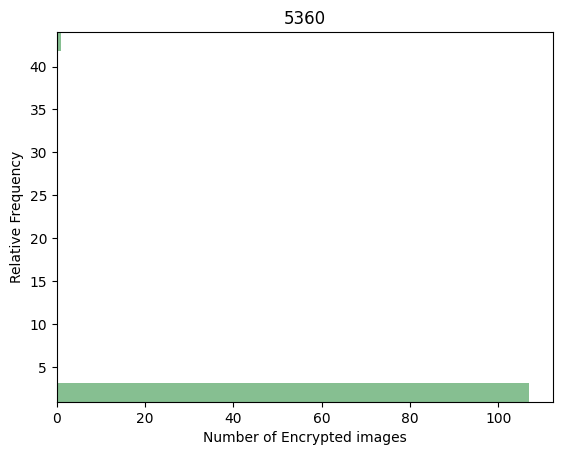

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import concurrent.futures
import datetime
from skimage import io
from skimage.transform import rescale, resize
from skimage.exposure import equalize_adapthist
from matplotlib.backends.backend_pdf import PdfPages
import sys
import time 
import datetime
sys.path.append('../')
import src.hash_encryption.config as config
import src.hash_encryption.utils as utils

ROOT_DIR = "./src/hash_encryption/utils"
viz = os.path.join(ROOT_DIR, config.visualization)
os.makedirs(viz, exist_ok=True)

def process_image(img_path):
    path = os.path.join(root, city, img_path)
    img = utils.read_tiff(path, config.image_size, resize_ratio=config.resize_ratio,
                          resizing=config.resizing, normalize=config.normalize, printing=config.printing)
    imageHash = utils.hash_difference(img)
    return imageHash

a = 0
root = config.DATASET

for city in os.listdir(root):
        start_time = time.time()
        images_path = os.path.join(root, city)
        print(f'{city} : {len(os.listdir(images_path))} images '.center(60, "-"))

        # Use concurrent.futures for parallel processing
        
        with concurrent.futures.ThreadPoolExecutor() as executor:
            list_hashes = list(executor.map(process_image, os.listdir(images_path)))

        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print(f'Training time for {city} : {total_time_str}')
        m = np.array(list_hashes)
        print(m.shape)
        
        data = {"img_hash": m, "img_names": os.listdir(images_path)}
        df = pd.DataFrame(data=data)
        num_img_per_hash = df.groupby("img_hash").size().sort_values(ascending=False).reset_index(name="img_names")
        print(num_img_per_hash)

        ax = plt.figure()
        num_img_per_hash.hist("img_names", bins=20, orientation="horizontal", color='#86bf91')
        plt.xlabel("Number of Encrypted images")
        plt.ylabel("Relative Frequency")
        plt.title(f'{city}')
        plt.ylim(1, num_img_per_hash.img_names[0])
        plt.grid(False)
        plt.show()
        yint = []
        locs, labels = plt.yticks()
        for each in locs:
            yint.append(int(each))
        plt.yticks(yint)

        
        plt.close()
        


